In [1]:
import os
import numpy as np
import pickle
import pandas as pd

import umap
import matplotlib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from data_loader import get_identifier

In [ ]:
# Run on sherlock
from collect_predictions import *

model_path = '/oak/stanford/groups/jamesz/zqwu/iPSC_data/model_save/ex_split/0-to-inf_ex/bkp.model'
target_day = 15

data_dirs = {
    '/oak/stanford/groups/jamesz/zqwu/iPSC_data/VALIDATION/line1_3R/ex7_full/0-to-0/': \
        '/oak/stanford/groups/jamesz/zqwu/iPSC_data/VALIDATION/line1_3R/ex7_full/ex-valid-pred-to-15/',
    '/oak/stanford/groups/jamesz/zqwu/iPSC_data/VALIDATION/line1_3R/ex15_full/0-to-0/': \
        '/oak/stanford/groups/jamesz/zqwu/iPSC_data/VALIDATION/line1_3R/ex15_full/ex-valid-pred-to-15/',
    '/oak/stanford/groups/jamesz/zqwu/iPSC_data/VALIDATION/line3_TNNI/ex4_full/0-to-0/': \
        '/oak/stanford/groups/jamesz/zqwu/iPSC_data/VALIDATION/line3_TNNI/ex4_full/ex-valid-pred-to-15/',
}

model = get_model(model_path)
input_filter = partial(filter_for_inf_predictor, day_min=1, day_max=12)
input_transform = partial(augment_fixed_end, end=target_day)

for data_dir, save_dir in data_dirs.items():
    valid_gen = get_data_gen(data_dir, CustomGenerator, batch_size=8, with_label=False)
    collect_embeddings(valid_gen, 
                       model,
                       save_dir, 
                       layer_names=[
                           'classify_head_pool1',
                           'classify_head_fc0',
                           'classify_head_fc1',
                           'classify_head_block4_relu',
                       ],
                       input_transform=input_transform, 
                       input_filter=input_filter)

In [ ]:
# Run on sherlock
from collect_predictions import *

model_path = '/oak/stanford/groups/jamesz/zqwu/iPSC_data/model_save/ex_split/0-to-inf_ex/test-bkp.model'
target_day = 18

data_dirs = {
    '/oak/stanford/groups/jamesz/zqwu/iPSC_data/VALIDATION/line_477/ex0/0-to-0/':
        '/oak/stanford/groups/jamesz/zqwu/iPSC_data/VALIDATION/line_477/ex0/ex-test-pred-to-18/',
    '/oak/stanford/groups/jamesz/zqwu/iPSC_data/VALIDATION/line_202/ex0/0-to-0/':
        '/oak/stanford/groups/jamesz/zqwu/iPSC_data/VALIDATION/line_202/ex0/ex-test-pred-to-18/',
    '/oak/stanford/groups/jamesz/zqwu/iPSC_data/VALIDATION/line_20/ex0/0-to-0/':
        '/oak/stanford/groups/jamesz/zqwu/iPSC_data/VALIDATION/line_20/ex0/ex-test-pred-to-18/',
    '/oak/stanford/groups/jamesz/zqwu/iPSC_data/VALIDATION/line_100/ex4/0-to-0/':
        '/oak/stanford/groups/jamesz/zqwu/iPSC_data/VALIDATION/line_100/ex4/ex-test-pred-to-18/',
    '/oak/stanford/groups/jamesz/zqwu/iPSC_data/VALIDATION/line_142/ex1/0-to-0/':
        '/oak/stanford/groups/jamesz/zqwu/iPSC_data/VALIDATION/line_142/ex1/ex-test-pred-to-18/',
    '/oak/stanford/groups/jamesz/zqwu/iPSC_data/VALIDATION/line_273/ex2/0-to-0/':
        '/oak/stanford/groups/jamesz/zqwu/iPSC_data/VALIDATION/line_273/ex2/ex-test-pred-to-18/',
    '/oak/stanford/groups/jamesz/zqwu/iPSC_data/VALIDATION/line_839/ex1/0-to-0/':
        '/oak/stanford/groups/jamesz/zqwu/iPSC_data/VALIDATION/line_839/ex1/ex-test-pred-to-18/',
    '/oak/stanford/groups/jamesz/zqwu/iPSC_data/VALIDATION/line_480/ex0/0-to-0/':
        '/oak/stanford/groups/jamesz/zqwu/iPSC_data/VALIDATION/line_480/ex0/ex-test-pred-to-18/',
    '/oak/stanford/groups/jamesz/zqwu/iPSC_data/VALIDATION/line_854/ex1/0-to-0/':
        '/oak/stanford/groups/jamesz/zqwu/iPSC_data/VALIDATION/line_854/ex1/ex-test-pred-to-18/',
    '/oak/stanford/groups/jamesz/zqwu/iPSC_data/VALIDATION/line_975/ex0/0-to-0/':
        '/oak/stanford/groups/jamesz/zqwu/iPSC_data/VALIDATION/line_975/ex0/ex-test-pred-to-18/',
}

model = get_model(model_path)
input_filter = partial(filter_for_inf_predictor, day_min=1, day_max=12)
input_transform = partial(augment_fixed_end, end=target_day)

for data_dir, save_dir in data_dirs.items():
    valid_gen = get_data_gen(data_dir, CustomGenerator, batch_size=8, with_label=False)
    collect_embeddings(valid_gen, 
                       model,
                       save_dir, 
                       layer_names=[
                           'classify_head_pool1',
                           'classify_head_fc0',
                           'classify_head_fc1',
                           'classify_head_block4_relu',
                       ],
                       input_transform=input_transform, 
                       input_filter=input_filter)

### Embeddings of original 3R datasets ###

In [ ]:
all_embeddings = pickle.load(open('VALIDATION/line1_3R/ex15_full/ex-valid-pred-to-15/embs_block4.pkl', 'rb'))
all_predictions = pickle.load(open('VALIDATION/line1_3R/ex15_full/ex-valid-pred-to-15/cla.pkl', 'rb'))
labels = pickle.load(open('VALIDATION/line1_3R/ex15_full/cla_labels.pkl', 'rb'))

names = all_embeddings['pred_names']
days = [int(get_identifier(n)[2]) for n in names]
wells = [get_identifier(n)[-2:] for n in names]
labels = [labels[w] if w in labels else 0.5 for w in wells]

preds = all_predictions['cla_preds']
preds = (preds[:, 1] + preds[:, 2] * 2 + preds[:, 3] * 3) / 3

embeddings = all_embeddings['embedding-classify_head_block4_relu']
embeddings = np.stack(embeddings).reshape((len(embeddings), -1))

pca = PCA(0.9)
_emb = pca.fit_transform(embeddings)

In [ ]:
valid_inds = np.arange(len(names))
colors_label = [matplotlib.cm.viridis(labels[i]) for i in valid_inds]
plt.figure(figsize=(2, 2))
plt.scatter([0] * len(colors_label), [0] * len(colors_label), s=20, color=colors_label)
plt.scatter([0], [0], s=50, color=['w'])
plt.axis('off')
plt.colorbar()
plt.savefig('figs/fig-emb/label_cbar.pdf', bbox_inches='tight')

In [ ]:
for _d in np.arange(1, 13):
    print(_d)
    valid_inds = np.arange(len(names))
    valid_inds = [i for i, d in enumerate(days) if d == _d]

    um = umap.UMAP(n_neighbors=20)
    _um = um.fit_transform(_emb[valid_inds])

    _km = KMeans(n_clusters=3)
    _km.fit_transform(_emb[valid_inds])
    
    km_label_mapping = {i: np.array(labels)[valid_inds][np.where(_km.labels_ == i)].mean() for i in range(3)}
    km_color_ordering = sorted(km_label_mapping.keys(), key=lambda x: km_label_mapping[x])


    valid_days = [days[i] for i in valid_inds]
    colors_day = np.array([matplotlib.cm.viridis(np.clip((days[i]-4)/8, 0., 1.)) for i in valid_inds])
    colors_label = np.array([matplotlib.cm.viridis(labels[i]) for i in valid_inds])
    colors_pred = np.array([matplotlib.cm.viridis(preds[i]) for i in valid_inds])
    colors_cluster = np.array([matplotlib.cm.tab10(km_color_ordering.index(i)) for i in _km.labels_])

    plot_inds = np.arange(len(valid_inds))
    np.random.shuffle(plot_inds)

    plt.figure(figsize=(5, 5))
    plt.scatter(_um[plot_inds][:, 0], _um[plot_inds][:, 1], color=colors_label[plot_inds], s=20)
    plt.axis('off')
    plt.savefig("figs/fig-emb/day%d-label.pdf" % _d)
    
    plt.figure(figsize=(5, 5))
    plt.scatter(_um[plot_inds][:, 0], _um[plot_inds][:, 1], color=colors_cluster[plot_inds], s=20)
    plt.axis('off')
    plt.savefig("figs/fig-emb/day%d-km.pdf" % _d)
    

### Embeddings of 10 additional lines ###

In [2]:
data_dirs = [
    'VALIDATION/line_477/ex0/', 
    'VALIDATION/line_202/ex0/', 
    'VALIDATION/line_20/ex0/', 
    'VALIDATION/line_100/ex4/', 
    'VALIDATION/line_142/ex1/', 
    'VALIDATION/line_273/ex2/', 
    'VALIDATION/line_839/ex1/', 
    'VALIDATION/line_480/ex0/', 
    'VALIDATION/line_854/ex1/', 
    'VALIDATION/line_975/ex0/', 
]

def read_validation_additional_lines_labels(file_path='additional_lines_labels.csv'):
    df = pd.read_csv(file_path, index_col=0, dtype='str')
    df.index = [tuple(n.split('_')) for n in df.index]
    mapping = {'0': 0.,
               '0*': 0.,
               '0(0.5)': 0.2,
               '0(1)': 0.4,
               '0/1': 0.4,
               '0(1.5)': 0.6,
               '0(1.5/2)': 0.8,
               '0(2)': 0.8,
               '0(2)*': 0.8,
               '1': 1.,
               '1*': 1.,
               'nan': np.nan,
               '-': np.nan}
    for col in df:
        values = [mapping[v] if v == v else np.nan for v in df[col]]
        df[col] = values
    return df

label_df = read_validation_additional_lines_labels('VALIDATION/additional_lines_labels.csv')

Processing line 477
Processing line 202
Processing line 20
Processing line 100
Processing line 142
Processing line 273
Processing line 839
Processing line 480
Processing line 854
Processing line 975
Processing line 477
Processing line 202
Processing line 20
Processing line 100
Processing line 142
Processing line 273
Processing line 839
Processing line 480
Processing line 854
Processing line 975
Processing line 477
Processing line 202
Processing line 20
Processing line 100
Processing line 142
Processing line 273
Processing line 839
Processing line 480
Processing line 854
Processing line 975
Processing line 477
Processing line 202
Processing line 20
Processing line 100
Processing line 142
Processing line 273
Processing line 839
Processing line 480
Processing line 854
Processing line 975
Processing line 477
Processing line 202
Processing line 20
Processing line 100
Processing line 142
Processing line 273
Processing line 839
Processing line 480
Processing line 854
Processing line 975
Proce

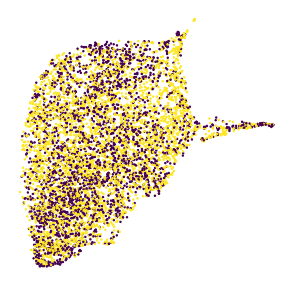

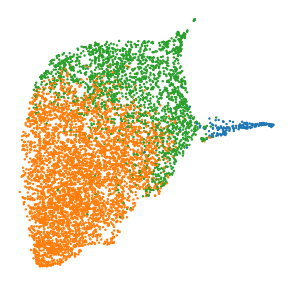

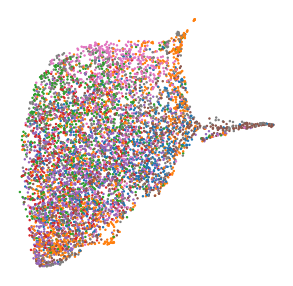

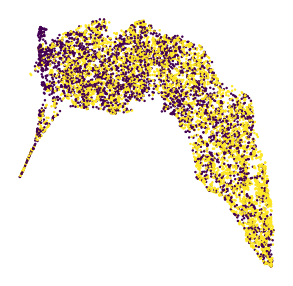

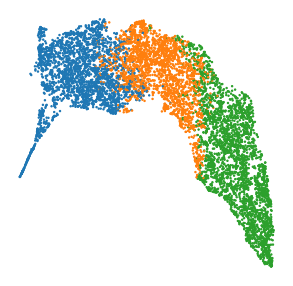

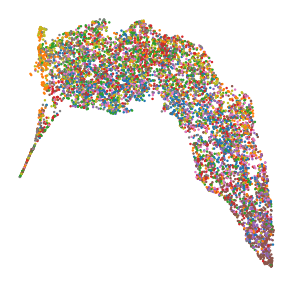

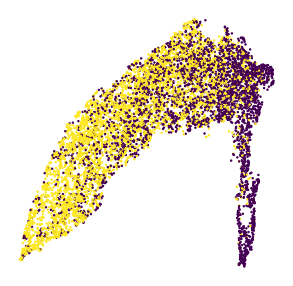

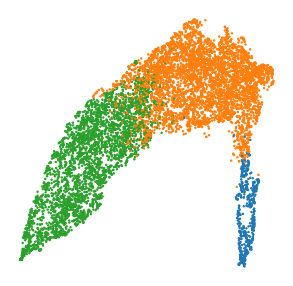

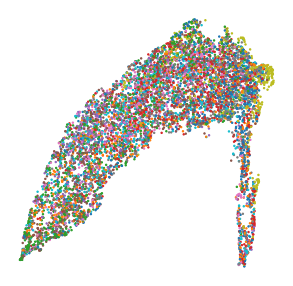

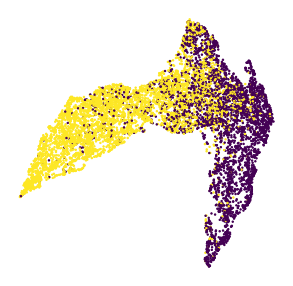

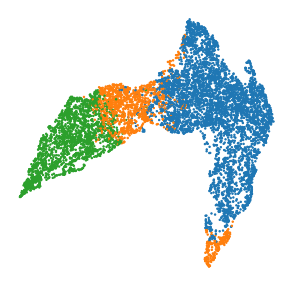

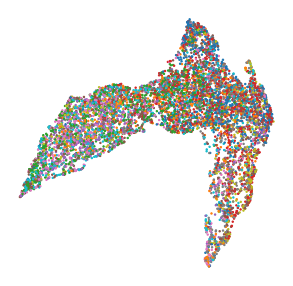

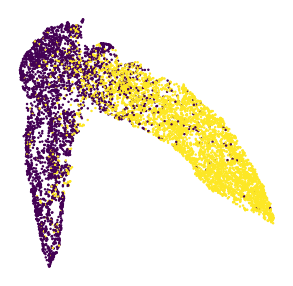

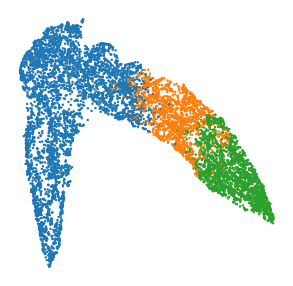

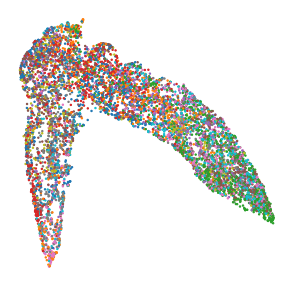

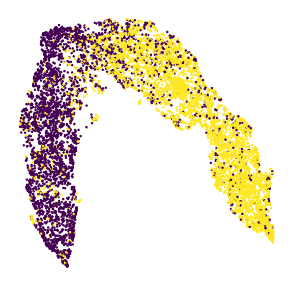

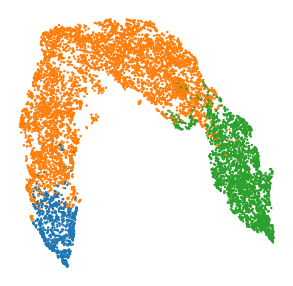

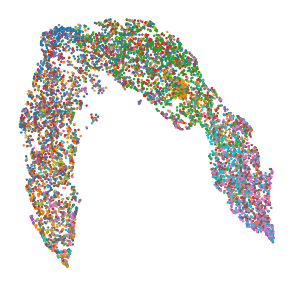

In [34]:
for target_day in [1, 3, 5, 7, 9, 12]:
    embeddings = []
    days = []
    labels = []
    line_names = []
    for data_dir in data_dirs:
        line_name = get_identifier(data_dir)[0].split('_')[1]
        all_embeddings = pickle.load(open(os.path.join(data_dir, 'ex-test-pred-to-18', 'embs.pkl'), 'rb'))
        print("Processing line %s" % line_name)
        label_dict = dict(label_df[line_name])

        all_names = all_embeddings['pred_names']
        all_days = [int(get_identifier(n)[2]) for n in all_names]
        all_wells = [get_identifier(n)[-2:] for n in all_names]
        all_labels = [label_dict[w] if w in label_dict else np.nan for w in all_wells]

        valid_inds = [i for i, d in enumerate(all_days) if d == target_day]
        embeddings.extend([all_embeddings['embedding-classify_head_block4_relu'][i] for i in valid_inds])
        days.extend([all_days[i] for i in valid_inds])
        labels.extend([all_labels[i] for i in valid_inds])
        line_names.extend([line_name] * len(valid_inds))

    embeddings = np.stack(embeddings).reshape((len(embeddings), -1))
    pca = PCA(20)
    _emb = pca.fit_transform(embeddings)
    
    
    um = umap.UMAP(n_neighbors=10)
    _um = um.fit_transform(_emb[:, :20])
    _km = AgglomerativeClustering(n_clusters=3)
    _km.fit(_emb[:, :20])

    km_label_mapping = {i: np.nanmean(np.array(labels)[np.where(_km.labels_ == i)]) for i in range(3)}
    km_color_ordering = sorted(km_label_mapping.keys(), key=lambda x: km_label_mapping[x])
    
    line_color_mapping = {line_name: i for i, line_name in enumerate(sorted(set(line_names)))}

    colors_label = np.array([matplotlib.cm.viridis(l) for l in labels])
    colors_cluster = np.array([matplotlib.cm.tab10(km_color_ordering.index(l)) for l in _km.labels_])
    colors_line = np.array([matplotlib.cm.tab10(line_color_mapping[l]) for l in line_names])

    # plot_inds = np.arange(len(labels))
    plot_inds = [i for i, label in enumerate(labels) if label < 0.1 or label > 0.9]
    np.random.shuffle(plot_inds)

    plt.figure(figsize=(5, 5))
    plt.scatter(_um[plot_inds][:, 0], _um[plot_inds][:, 1], color=colors_label[plot_inds], s=2)
    plt.axis('off')
    plt.savefig("figs/fig2-emb/day%d-label.pdf" % target_day)

    plt.figure(figsize=(5, 5))
    plt.scatter(_um[plot_inds][:, 0], _um[plot_inds][:, 1], color=colors_cluster[plot_inds], s=2)
    plt.axis('off')
    plt.savefig("figs/fig2-emb/day%d-km.pdf" % target_day)

    plt.figure(figsize=(5, 5))
    plt.scatter(_um[plot_inds][:, 0], _um[plot_inds][:, 1], color=colors_line[plot_inds], s=2)
    plt.axis('off')
    plt.savefig("figs/fig2-emb/day%d-line.pdf" % target_day)

C:\Users\zhenq\AppData\Local\Temp/ipykernel_3748/4109435180.py:6: RuntimeWarning: Mean of empty slice
  km_label_mapping = {i: np.nanmean(np.array(labels)[np.where(_km.labels_ == i)]) for i in range(6)}


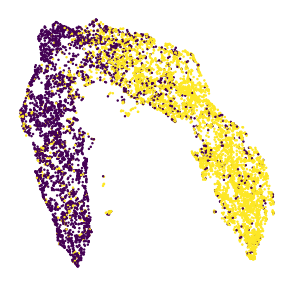

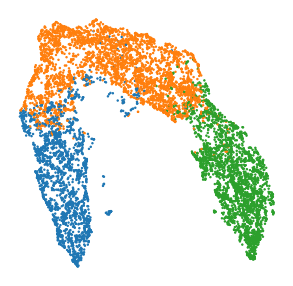

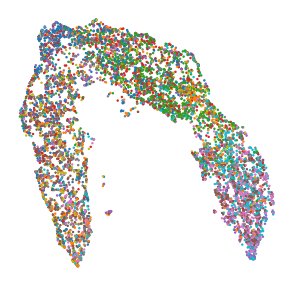

In [31]:
    um = umap.UMAP(n_neighbors=5)
    _um = um.fit_transform(_emb[:, :20])
    _km = AgglomerativeClustering(n_clusters=3)
    _km.fit(_emb[:, :20])

    km_label_mapping = {i: np.nanmean(np.array(labels)[np.where(_km.labels_ == i)]) for i in range(6)}
    km_color_ordering = sorted(km_label_mapping.keys(), key=lambda x: km_label_mapping[x])
    
    line_color_mapping = {line_name: i for i, line_name in enumerate(sorted(set(line_names)))}

    colors_label = np.array([matplotlib.cm.viridis(l) for l in labels])
    colors_cluster = np.array([matplotlib.cm.tab10(km_color_ordering.index(l)) for l in _km.labels_])
    colors_line = np.array([matplotlib.cm.tab10(line_color_mapping[l]) for l in line_names])

    # plot_inds = np.arange(len(labels))
    plot_inds = [i for i, label in enumerate(labels) if label < 0.1 or label > 0.9]
    np.random.shuffle(plot_inds)

    plt.figure(figsize=(5, 5))
    plt.scatter(_um[plot_inds][:, 0], _um[plot_inds][:, 1], color=colors_label[plot_inds], s=2)
    plt.axis('off')
    plt.savefig("figs/fig2-emb/day%d-label.pdf" % target_day)

    plt.figure(figsize=(5, 5))
    plt.scatter(_um[plot_inds][:, 0], _um[plot_inds][:, 1], color=colors_cluster[plot_inds], s=2)
    plt.axis('off')
    plt.savefig("figs/fig2-emb/day%d-km.pdf" % target_day)

    plt.figure(figsize=(5, 5))
    plt.scatter(_um[plot_inds][:, 0], _um[plot_inds][:, 1], color=colors_line[plot_inds], s=2)
    plt.axis('off')
    plt.savefig("figs/fig2-emb/day%d-line.pdf" % target_day)